In [67]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import matplotlib_fname
%matplotlib inline

In [68]:
def f(x):
    return 4*x**2+2*x+3

In [69]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([ 93.  ,  83.75,  75.  ,  66.75,  59.  ,  51.75,  45.  ,  38.75,
        33.  ,  27.75,  23.  ,  18.75,  15.  ,  11.75,   9.  ,   6.75,
         5.  ,   3.75,   3.  ,   2.75,   3.  ,   3.75,   5.  ,   6.75,
         9.  ,  11.75,  15.  ,  18.75,  23.  ,  27.75,  33.  ,  38.75,
        45.  ,  51.75,  59.  ,  66.75,  75.  ,  83.75,  93.  , 102.75])

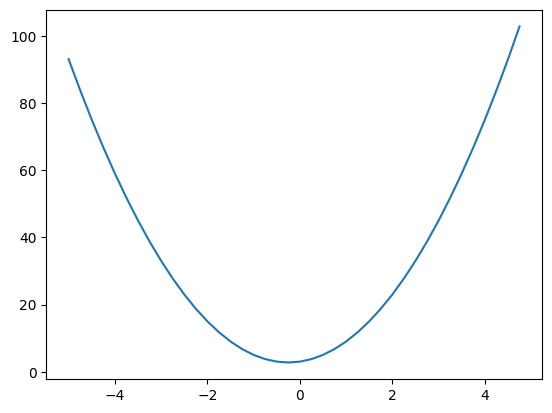

In [70]:
plt.plot(xs,ys)

In [71]:
h = 0.0000000000001
x = -3.0

(f(x+h) - f(x))/h

-21.955770534987096

In [72]:
a = 2.0
b = 3.5
c = -2.4

d1 = a*b + c
a += h
d2 = a*b + c
print(d1)
print(d2)
slope = (d2-d1)/h
slope

4.6
4.60000000000035


3.4994229736184934

In [81]:
class Value:
    def __init__(self,data,_children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data, (self,other), '+')
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data, (self, other), '*')
        return out
a = Value(2.0, label = "a")
b = Value(-3.0, label = "b")
c = Value(10.0, label = "c")
e = a+b
e.label = "e"
d = e + c
d.label = "d"

In [82]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

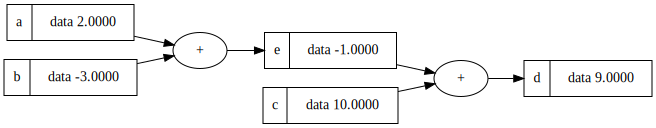

In [83]:
draw_dot(d)